## US Election 2020 Tweets Analysis

The ["US Election 2020 Tweets" dataset](https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data) provides an extensive collection of tweets from around the world that include hashtags related to the 2020 U.S. presidential candidates, Biden and Trump.

### Objectives
For this analysis, we will focus exclusively on single tweets from each unique Twitter user based in the United States, and in English, to perform text analysis with three main goals:

- **Tweets distribution Analysis**: Clear the dataset and prepare it for a general analysis. Describe how tweets are distributed between the two U.S. candidates in all US and across federal states;
- **Global Sentiment Analysis**: Clear the dataset and prepare it for a Sentiment Text Analysis. Assess the sentiment of the global population of Twitter users towards Biden and Trump evaluating which sentiment preveals on each of them;
- **Federal States Sentiment Analysis**: Assess the sentiment of each Federal state Twitter users towards Biden and Trump and use it as a proxy for the election outcome (**Subsection A**). Evaluate the power of the proxy using the outcome of 2020 elections (**Subsection B**). 



-----------

# Global Sentiment Analysis


This code firstly performs data cleaning for text analysis through Tokenization, exlusion of Stopwords, Lemmatization and Pos Tagging. This allows for a frequency analysis of the whole dataset.
Then, by first focusing on each candidate separately, the sentiment analysis aims to show which are the attitudes towards Trump and Biden and the most used topics or words in the tweets.
The final step consists in conducting a comparison between the sentiment analysis outcomes. 

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import plotly.express as px 
import plotly.io as pio
from pathlib import Path
import os

# Libraries for Sentiment Analysis 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, words
from nltk.probability import FreqDist

## Import dataset

Set the directory

In [2]:
# Define the base path
base_path = Path("/Users/chiaraperugini/Downloads/phyton/projectelections")
# Change the working directory
os.chdir(base_path)

# Define the full path to the CSV file for Trump and Biden
merged_data = base_path / "data.csv"

# Print the current working directory
print("Current Working Directory:", Path.cwd())

Current Working Directory: /Users/chiaraperugini/Downloads/phyton/projectelections


Load data

In [3]:
try:
    data = pd.read_csv(merged_data, encoding="utf-8", engine='python', on_bad_lines='skip')
    print("First 5 rows of the DataFrame:")
    print(data.head())
except Exception as e:
    print("Error loading the file:", e)

First 5 rows of the DataFrame:
   index           created_at      tweet_id  \
0      0  2020-10-15 00:00:01  1.316529e+18   
1      2  2020-10-15 00:00:02  1.316529e+18   
2      4  2020-10-15 00:00:08  1.316529e+18   
3      5  2020-10-15 00:00:17  1.316529e+18   
4      7  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #Trump: As a student I used to hear for years,...    2.0            1.0   
2  You get a tie! And you get a tie! #Trump ‘s ra...    4.0            3.0   
3  @CLady62 Her 15 minutes were over long time ag...    2.0            0.0   
4  @DeeviousDenise @realDonaldTrump @nypost There...    0.0            0.0   

                source       user_id  \
0            TweetDeck  3.606665e+08   
1      Twitter Web App  8.436472e+06   
2   Twitter for iPhone  4.741380e+07   
3  Twitter for Android  1.138416e+09   
4   Twitter for i

### Text Analysis Data Cleaning

In [4]:
#Turn the tweets into lowercase letters
data['tweet'] = data['tweet'].str.lower()  
print("Sample of 5 tweets after converting to lowercase:")
print(data['tweet'].sample(5))  # Check randomly

Sample of 5 tweets after converting to lowercase:
366099    black women delivered this election. \nblack w...
35555     @sarahburris #trump is one who desperately nee...
68069     📣 #biden y #trump plantean agendas de inmigrac...
306989    #biden/#harris support federally funded aborti...
10261     dear evangelicals... this is your chosen one.....
Name: tweet, dtype: object


In [5]:
# Check if each tweet is composed only of lowercase characters
all_lowercase = data['tweet'].apply(lambda x: x.islower())

# Count the number of tweets that are not in lowercase
non_lowercase_count = all_lowercase.value_counts().get(False, 0)  # Count False values
print("Number of tweets not in lowercase:", non_lowercase_count)

Number of tweets not in lowercase: 135


The problem persists: some tweets have parts that are written in **bold** or *italics*.

In [6]:
# Use unicodedata to normalize these special Unicode characters to their base forms before converting them to lowercase.
import unicodedata 
data['tweet'] = data['tweet'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8').lower())
# Check if each tweet is composed only of lowercase characters
all_lowercase = data['tweet'].apply(lambda x: x.islower())

# Count the number of tweets that are not in lowercase
non_lowercase_count = all_lowercase.value_counts().get(False, 0)  # Count False values
print("Number of tweets not in lowercase:", non_lowercase_count)

# Check randomly
print("Sample of 5 tweets after converting to lowercase:")
print(data['tweet'].sample(5))  

Number of tweets not in lowercase: 0
Sample of 5 tweets after converting to lowercase:
34787     wish this were true but i don't believe it. tw...
304007    many #prayersarecontinuingtogoup!!! neverthele...
263800    @realdailywire the debate was a personal win f...
168313    for trump, the simplest scientific information...
75504     spot the difference. @speakerpelosi @realdonal...
Name: tweet, dtype: object


## Tokenization

### Sentence Tokenization

In [7]:
data['tokenized_tweet'] = data['tweet'].apply(sent_tokenize)
print("Sample of tokenized tweets:")
print(data['tokenized_tweet'].sample(5))  # Verify first rows

Sample of tokenized tweets:
377184    [our president, at a labor day picnic in iowa....
256323    [wait #biden was #vicepresident 3 years ago?, ...
374884    [try to tear gas this @realdonaldtrump., yes t...
144089    [we #voted #trump by a landslide!, #richievote...
199049                      [fore   #uselection2020 #trump]
Name: tokenized_tweet, dtype: object


Remove punctuations

In [8]:
# Function to remove punctuation
def remove_punctuation(tokens):
    return [re.sub(r'[^\w\s]', '', word) for word in tokens]

# Remove punctuation from the column 'tokenized_tweet'
data['tokenized_tweet'] = data['tokenized_tweet'].apply(remove_punctuation)
print("Sample of tokenized tweets after punctuation removal:")
print(data['tokenized_tweet'].sample(5))

#Function to check for punctuation in a list of tokens
def contains_punctuation(tokens):
    return any(re.search(r'[^\w\s]', word) for word in tokens)

# Check if any tokenized tweets contain punctuation
tweets_with_punctuation = data['tokenized_tweet'].apply(contains_punctuation)

# Count the number of tokenized tweets that contain punctuation. There are 0 tokenized tweets with punctuation
punctuation_count = tweets_with_punctuation.value_counts().get(True, 0)  # Count True values and 0 if no tweet with punctuation
print("Number of tokenized tweets containing punctuation:", punctuation_count)

Sample of tokenized tweets after punctuation removal:
331986    [ urgente se mueven las cifras  \ntrump vs bid...
290228    [hey electricitynw, who are you voting for thi...
294136    [take note, dont vote for joebiden httpstcoygi...
311244     [joebiden will ruin america, httpstcohof1grs1iu]
164274    [imnotapoliticalperson but dont forget my amon...
Name: tokenized_tweet, dtype: object
Number of tokenized tweets containing punctuation: 0


### Word Tokenization

In [9]:
tokenized_words = data['tokenized_tweet'].apply(lambda x: [word_tokenize(sentence) for sentence in x])
print("Sample of word tokenized tweets:")
print(tokenized_words.sample(5))

Sample of word tokenized tweets:
100334    [[trump, goes, after, rude, lesley, stahl, at,...
77312     [[trump, administration, admitting, defeat, on...
213559    [[it, certainly, did, does, and, will], [biden...
239505    [[wheres, hunter, and, why, is, joebiden, not,...
368748    [[if, rancor, dissipates, and, tranquility, is...
Name: tokenized_tweet, dtype: object


Flate the column tweet

In [10]:
# flat the list of lists in just a lists of sentences
all_words_flat = [word for sublist in tokenized_words for word in sublist]
print("First 10 words from the flattened list:")
print(all_words_flat[:10])  # Stampa le prime 10 parole

#flat the list of sentences in a list of words
all_word_list = [word for sublist in all_words_flat for word in sublist]
print("First 10 words from the one list:")
print(all_word_list[:100])  # Stampa le prime 10 parole

First 10 words from the flattened list:
[['elecciones2020', 'en', 'florida', 'joebiden', 'dice', 'que', 'donaldtrump', 'solo', 'se', 'preocupa', 'por', 'el', 'mismo'], ['el', 'democrata', 'fue', 'anfitrion', 'de', 'encuentros', 'de', 'electores', 'en', 'pembrokepines', 'y', 'miramar'], ['clic', 'aqui', 'httpstcoqhiwpiuxst', '_', 'elsollatino', 'yobrilloconelsol', 'httpstco6flcbwf1mi'], ['trump', 'as', 'a', 'student', 'i', 'used', 'to', 'hear', 'for', 'years', 'for', 'ten', 'years', 'i', 'heard', 'china'], ['in', '2019'], ['and', 'we', 'have', '15', 'and', 'they', 'dont', 'know', 'how', 'many', 'we', 'have', 'and', 'i', 'asked', 'them', 'how', 'many', 'do', 'we', 'have', 'and', 'they', 'said', 'sir', 'we', 'dont', 'know'], ['but', 'we', 'have', 'millions'], ['like', '300', 'million'], ['um'], ['what']]
First 10 words from the one list:
['elecciones2020', 'en', 'florida', 'joebiden', 'dice', 'que', 'donaldtrump', 'solo', 'se', 'preocupa', 'por', 'el', 'mismo', 'el', 'democrata', 'fue', '

## English Words Selection

 Remove **Links**

In [11]:
#count the links
http_count = len([word for word in all_word_list if word.startswith("http")])

print("Count of words starting with 'http':", http_count)

Count of words starting with 'http': 257850


In [12]:
###we retain only those words that are not links
all_word_list = [word for word in all_word_list if not word.startswith("http")]

###Check if there are any words starting with "https" in filtered_word
has_https = any(word.startswith("https") for word in all_word_list)

if has_https:
    print("There are still words starting with 'https' in filtered_word.")
else:
    print("No words starting with 'https' remain in filtered_word.")

print(all_word_list[:100]) 

No words starting with 'https' remain in filtered_word.
['elecciones2020', 'en', 'florida', 'joebiden', 'dice', 'que', 'donaldtrump', 'solo', 'se', 'preocupa', 'por', 'el', 'mismo', 'el', 'democrata', 'fue', 'anfitrion', 'de', 'encuentros', 'de', 'electores', 'en', 'pembrokepines', 'y', 'miramar', 'clic', 'aqui', '_', 'elsollatino', 'yobrilloconelsol', 'trump', 'as', 'a', 'student', 'i', 'used', 'to', 'hear', 'for', 'years', 'for', 'ten', 'years', 'i', 'heard', 'china', 'in', '2019', 'and', 'we', 'have', '15', 'and', 'they', 'dont', 'know', 'how', 'many', 'we', 'have', 'and', 'i', 'asked', 'them', 'how', 'many', 'do', 'we', 'have', 'and', 'they', 'said', 'sir', 'we', 'dont', 'know', 'but', 'we', 'have', 'millions', 'like', '300', 'million', 'um', 'what', 'you', 'get', 'a', 'tie', 'and', 'you', 'get', 'a', 'tie', 'trump', 's', 'rally', 'iowa', 'clady62', 'her']


Remove **non-english** words

In [13]:
# Get the set of English words
english_words = set(words.words()) #remember to add biden back

#Since we have some words that are spanish but are also part of the english dictionary, we try to drop them
nltk.download('cess_esp')  # A Spanish corpus
from nltk.corpus import cess_esp
spanish_words = set(cess_esp.words())

non_english_words = spanish_words 

[nltk_data] Downloading package cess_esp to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [14]:
# Remove non-English words and count them
filtered_english_words = [
    word for word in all_word_list
    if word in english_words and word not in non_english_words or word.lower() == "biden"
]

total_words = len(all_word_list)

non_english_count = total_words - len(filtered_english_words)

print("Number of non-English words removed:", non_english_count) 

print("Filtered English words:", filtered_english_words[:100]) 

# Check if any non-English words remain in filtered_english_words
remaining_non_english = [word for word in filtered_english_words if word not in english_words]
if remaining_non_english:
    print("Non-English words still present:", remaining_non_english[:100])
else:
    print("All words are now English.")

Number of non-English words removed: 3205015
Filtered English words: ['trump', 'as', 'student', 'i', 'used', 'to', 'hear', 'for', 'for', 'ten', 'i', 'in', 'and', 'we', 'have', 'and', 'they', 'dont', 'know', 'how', 'many', 'we', 'have', 'and', 'i', 'them', 'how', 'many', 'do', 'we', 'have', 'and', 'they', 'said', 'sir', 'we', 'dont', 'know', 'but', 'we', 'have', 'millions', 'like', 'million', 'um', 'what', 'you', 'get', 'tie', 'and', 'you', 'get', 'tie', 'trump', 's', 'rally', 'her', 'were', 'over', 'long', 'time', 'ago', 'never', 'the', 'black', 'community', 'she', 'cried', 'to', 'trump', 'begging', 'for', 'job', 'there', 'wont', 'be', 'many', 'of', 'them', 'unless', 'you', 'all', 'have', 'been', 'voting', 'more', 'than', 'again', 'but', 'god', 'bo', 'was', 'the', 'most', 'corrupt', 'president', 'ever', 'dark', 'to', 'light']
Non-English words still present: ['biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'biden', 'b

## Stopwords

Remove stop words

In [15]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'then', 'shouldn', 'should', 'before', 'can', "should've", 'during', 'yourself', 'will', 'not', 'o', 'her', 'of', 'll', 'what', 'from', "hasn't", 'that', 'did', "hadn't", 'only', "won't", 'both', "shan't", 'weren', 'y', 've', "aren't", 'his', 'hadn', 'herself', 'if', 'does', 'yours', 'after', 'any', "she's", 'no', 'won', 'were', 'below', 't', 'which', "weren't", 'mustn', 'he', 'in', 'this', 'been', 'some', "you'll", 'be', 'hasn', "haven't", 'it', 'doing', 'whom', 's', 'haven', 'against', 'most', 'so', 'him', 'their', 'me', "you're", 'd', "don't", 'too', 'nor', 'ours', 'under', 'have', 'where', 'once', 'there', 'myself', 'doesn', 'shan', 'to', 'having', 'aren', 'these', 'our', "needn't", 'wasn', 'few', 'an', 'couldn', 'own', 'because', 'my', 'themselves', 'down', 'am', 'above', 'than', 'on', 'until', 'by', 'those', "couldn't", 'ma', 'a', 'do', 'the', 'as', 'hers', 'again', 'same', 'wouldn', 'why', 'each', "you've", 'or', 'just', 'they', 'such', 'at', 'is', 'was', 'while', 'your', 'more

Here the issue is that there are still non relevant english words that are not informative at all and that we can try to eliminate as stopwords

In [16]:
# Define auxiliary verbs you want to add to the stop words set
auxiliary_verbs = ["do", "get", "need", "know", "have",
                   "be", "will", "shall", "go", "one", "take", "see", "good",
                   "can", "could", "would", "should", "may", "might", "must", "dont"]

# Add auxiliary verbs to the stop words set
stop_words.update(auxiliary_verbs)

# Print the updated stop words set to verify
print(stop_words)

{'then', 'one', 'shouldn', 'should', 'before', 'can', "should've", 'during', 'yourself', 'will', 'not', 'may', 'o', 'her', 'of', 'll', 'what', 'from', "hasn't", 'that', 'did', "hadn't", 'only', "won't", 'shall', 'both', "shan't", 'weren', 'y', 've', "aren't", 'his', 'hadn', 'get', 'herself', 'if', 'does', 'yours', 'after', 'any', "she's", 'no', 'won', 'were', 'below', 't', 'which', "weren't", 'mustn', 'he', 'in', 'this', 'been', 'some', "you'll", 'be', 'hasn', "haven't", 'it', 'doing', 'whom', 's', 'haven', 'against', 'most', 'so', 'him', 'their', 'me', "you're", 'd', "don't", 'too', 'nor', 'ours', 'under', 'have', 'where', 'once', 'there', 'myself', 'doesn', 'shan', 'to', 'having', 'aren', 'these', 'our', "needn't", 'wasn', 'good', 'must', 'few', 'an', 'couldn', 'own', 'because', 'my', 'themselves', 'down', 'am', 'above', 'than', 'would', 'on', 'until', 'by', 'need', 'those', "couldn't", 'ma', 'a', 'do', 'know', 'the', 'as', 'hers', 'again', 'same', 'wouldn', 'see', 'why', 'each', "yo

In [17]:
# Rimuovi le stopword 
filtered_word = []
for w in filtered_english_words:
    if w not in stop_words:
        filtered_word.append(w)

## Lemmatization

In [18]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

resources = [
    'names',  # A list of common English names
    'stopwords',  # A list of common words
    'state_union',  # Transcribed State of the Union addresses
    'twitter_samples',  # A list of Twitter phrases
    'movie_reviews',  # Two thousand categorized movie reviews
    'averaged_perceptron_tagger',  # POS tagging model
    'vader_lexicon',  # Scored lexicon for sentiment analysis
    'punkt',  # Sentence tokenizer
    'wordnet'
]

# Download each resource
for resource in resources:
    nltk.download(resource)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/chiaraperugini/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Use

In [19]:
lem = WordNetLemmatizer()

lemmatized_words = [lem.lemmatize(word) for word in filtered_word] 
print("Original words:", filtered_word[:100])
print("Lemmatized Words:", lemmatized_words[:100]) #need for pos tagging in order to have lemmatization that works properly 

Original words: ['trump', 'student', 'used', 'hear', 'ten', 'many', 'many', 'said', 'sir', 'millions', 'like', 'million', 'um', 'tie', 'tie', 'trump', 'rally', 'long', 'time', 'ago', 'never', 'black', 'community', 'cried', 'trump', 'begging', 'job', 'wont', 'many', 'unless', 'voting', 'god', 'bo', 'corrupt', 'president', 'ever', 'dark', 'light', 'coming', 'wouldnt', 'last', 'forever', 'trump', 'single', 'effective', 'eradicate', 'another', 'round', 'trump', 'plague', 'censorship', 'twitter', 'manipulate', 'us', 'election', 'trump', 'twitter', 'thats', 'always', 'fine', 'jack', 'jack', 'sick', 'trump', 'winning', 'trump', 'pay', 'mass', 'murder', 'family', 'spent', 'tax', 'payer', 'time', 'money', 'chasing', 'trump', 'serving', 'public', 'economically', 'bail', 'people', 'protect', 'took', 'oath', 'trump', 'nobody', 'tell', 'better', 'way', 'working', 'check', 'totally', 'mail', 'right', 'twitter', 'right', 'censorship', 'condemned', 'trump']
Lemmatized Words: ['trump', 'student', 'used

## POS tagging

In [20]:
tagged_words=nltk.pos_tag(filtered_word)
print(tagged_words[:100])

[('trump', 'NN'), ('student', 'NN'), ('used', 'VBN'), ('hear', 'RB'), ('ten', 'JJ'), ('many', 'JJ'), ('many', 'JJ'), ('said', 'VBD'), ('sir', 'JJ'), ('millions', 'NNS'), ('like', 'IN'), ('million', 'CD'), ('um', 'JJ'), ('tie', 'JJ'), ('tie', 'NN'), ('trump', 'NNS'), ('rally', 'RB'), ('long', 'JJ'), ('time', 'NN'), ('ago', 'RB'), ('never', 'RB'), ('black', 'JJ'), ('community', 'NN'), ('cried', 'VBD'), ('trump', 'NN'), ('begging', 'VBG'), ('job', 'NN'), ('wont', 'VBD'), ('many', 'JJ'), ('unless', 'IN'), ('voting', 'VBG'), ('god', 'NN'), ('bo', 'NN'), ('corrupt', 'NN'), ('president', 'NN'), ('ever', 'RB'), ('dark', 'JJ'), ('light', 'NN'), ('coming', 'VBG'), ('wouldnt', 'JJ'), ('last', 'JJ'), ('forever', 'NN'), ('trump', 'VBD'), ('single', 'JJ'), ('effective', 'JJ'), ('eradicate', 'NN'), ('another', 'DT'), ('round', 'NN'), ('trump', 'NN'), ('plague', 'NN'), ('censorship', 'NN'), ('twitter', 'NN'), ('manipulate', 'VBP'), ('us', 'PRP'), ('election', 'NN'), ('trump', 'NN'), ('twitter', 'NN'),

In [21]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


In [22]:
tagged_words = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), tagged_words)

We perform again lemmatization, which after POS tagging shall work properly 

In [23]:
lem_words=[]
for word, tag in tagged_words:
        if tag is None:
            #if there is no available tag, append the token as it is
            lem_words.append(word)
        else:        
            #else use the tag to lemmatize the token
            lem_words.append(lem.lemmatize(word, tag))

In [24]:
print('lemmatized words: ', lem_words[:100])

lemmatized words:  ['trump', 'student', 'use', 'hear', 'ten', 'many', 'many', 'say', 'sir', 'million', 'like', 'million', 'um', 'tie', 'tie', 'trump', 'rally', 'long', 'time', 'ago', 'never', 'black', 'community', 'cry', 'trump', 'beg', 'job', 'wont', 'many', 'unless', 'vote', 'god', 'bo', 'corrupt', 'president', 'ever', 'dark', 'light', 'come', 'wouldnt', 'last', 'forever', 'trump', 'single', 'effective', 'eradicate', 'another', 'round', 'trump', 'plague', 'censorship', 'twitter', 'manipulate', 'us', 'election', 'trump', 'twitter', 'thats', 'always', 'fine', 'jack', 'jack', 'sick', 'trump', 'win', 'trump', 'pay', 'mass', 'murder', 'family', 'spend', 'tax', 'payer', 'time', 'money', 'chase', 'trump', 'serve', 'public', 'economically', 'bail', 'people', 'protect', 'take', 'oath', 'trump', 'nobody', 'tell', 'good', 'way', 'work', 'check', 'totally', 'mail', 'right', 'twitter', 'right', 'censorship', 'condemn', 'trump']


## Frequency analysis

In [25]:
from nltk.probability import FreqDist
fdist = FreqDist(lem_words) 

In [26]:
fdist.most_common(10)  #frequency of ten most common words

[('trump', 265683),
 ('biden', 168579),
 ('president', 29046),
 ('election', 27394),
 ('like', 22398),
 ('people', 22112),
 ('say', 20835),
 ('us', 18747),
 ('joe', 17793),
 ('go', 16438)]

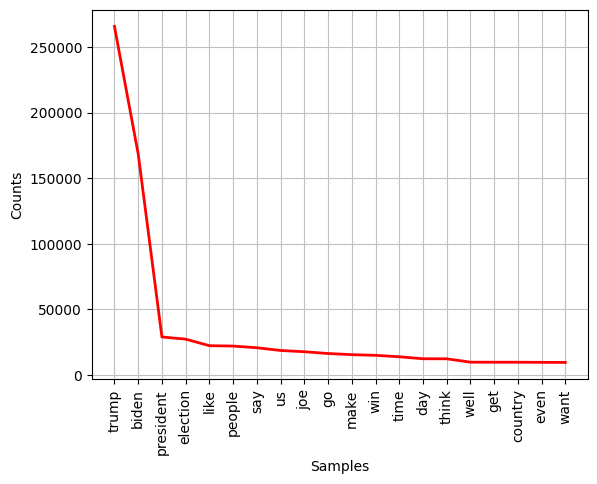

In [27]:
fdist.plot(20,cumulative=False, color='red')
plt.show()

**COMMENT ON THE FREQUENCY PLOT** According to the plot, the majority of tweets mention Trump directly, while Biden is cited considerably less often. This suggests that Trump is the more controversial figure in the election, and so the most commented one. Beyond the names of the two presidential candidates, frequently used words include "president", "elections," "people," "like," "us," and "win." These common terms, closely related to election issues, are unsurprising given the topic of interest: the U.S. elections.

## Functions for Sentiment Analysis

We shall only take into account US citizens’ opinions here, as they are a crucial deciding factor in who becomes the US president.

In [28]:
def clean(text): 
	# Remove URLs 
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text)) 

	# Convert text to lowercase (after turning bold and italics into normal text)
	text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8').lower()

	# Replace anything other than alphabets a-z with a space 
	text = re.sub('[^a-z]', ' ', text) 

	# Split the text into single words 
	text = text.split() 

	# Initialize WordNetLemmatizer 
	lm = WordNetLemmatizer() 

	# Lemmatize words and remove stopwords 
	text = [lm.lemmatize(word) for word in text if word not in set( 
		stopwords.words('english'))] 

	# Join the words back into a sentence 
	text = ' '.join(word for word in text) 

	return text 

Get polarity, subjectivity, and Analysis Now, let’s create a function to get polarity, subjectivity, and Analysis function to fetch sentiments from the data.

In [29]:
def getpolarity(text): 
    return TextBlob(text).sentiment.polarity 

def getsubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'

## Sentiment Analysis for **Trump**

In [30]:
# focus on tweets that were originally in the trump dataset
trump_tweets = data[data['candidate'] == 'trump'] 
# take only U.S. country data 
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US'] 
trump_tweets = trump_tweets[['tweet']] #consider only the tweet column
print(trump_tweets.head()) 


                                               tweet
0  #elecciones2020 | en #florida: #joebiden dice ...
1  #trump: as a student i used to hear for years,...
2  you get a tie! and you get a tie! #trump s ral...
3  @clady62 her 15 minutes were over long time ag...
4  @deeviousdenise @realdonaldtrump @nypost there...


In [31]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean) 
print(trump_tweets.head()) 

                                               tweet  \
0  #elecciones2020 | en #florida: #joebiden dice ...   
1  #trump: as a student i used to hear for years,...   
2  you get a tie! and you get a tie! #trump s ral...   
3  @clady62 her 15 minutes were over long time ag...   
4  @deeviousdenise @realdonaldtrump @nypost there...   

                                           cleantext  
0  elecciones en florida joebiden dice que donald...  
1  trump student used hear year ten year heard ch...  
2                   get tie get tie trump rally iowa  
3  clady minute long time ago omarosa never repre...  
4  deeviousdenise realdonaldtrump nypost wont man...  


In [32]:
fdist = FreqDist(trump_tweets['cleantext']) 
fdist.most_common(10)

[('trump', 1384),
 ('realdonaldtrump anti trump please vote makeamericaunitedagain vetsforscience ftrumps operationmaga antitrump dumptrump biden trump voteblue negligenthomicide blm murdererinchief bidenharris shitler fucktrumpsshit',
  543),
 ('donaldtrump', 226),
 ('trump gop maga election voteblue rememberinnovember vote blue', 119),
 ('trump naysay stimulus ubi gli package leaf risk community unable prep extinctionlevelevent ele teotwawki climateapocalypse pandemic shtf',
  111),
 ('anti trump please vote makeamericaunitedagain vetsforscience ftrumps operationmaga antitrump dumptrump biden trump voteblue negligenthomicide blm murdererinchief bidenharris shitler fucktrumpsshit',
  106),
 ('trump trump', 106),
 ('arizona arizonacircle bb covid gh israel kanganaranaut kamalaharris kiddwaya mewgulf netflix p quote cat trumprally azkar votebidenharris xrp catsoftwitter cat catsofinstagram kitten trump',
  100),
 ('trump trump maga', 98),
 ('vote trump', 95)]

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

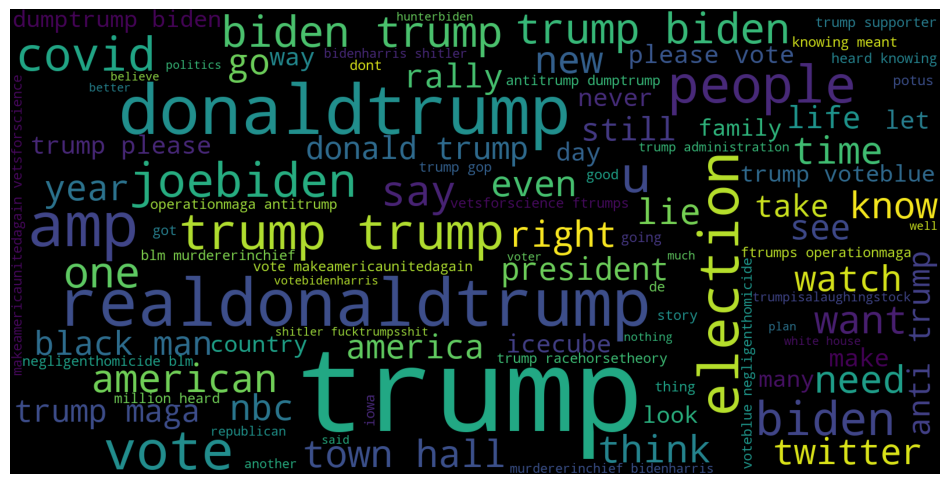

In [34]:
def word_cloud(wd_list): 
	stopwords = set(STOPWORDS) 
	all_words = ' '.join([text for text in wd_list]) 
	wordcloud = WordCloud(background_color='black', 
						stopwords=stopwords, 
						width=1600, height=800, max_words=100, max_font_size=200, 
						colormap="viridis").generate(all_words) 
	plt.figure(figsize=(12, 10)) 
	plt.axis('off') 
	plt.imshow(wordcloud) 

word_cloud(trump_tweets['cleantext'][:5000]) 

**COMMENT ON THE WORDCLOUD** This cloud of words is used to understand the overall sentiment of the tweets in Trump's dataset. Besides "trump" and recurrent formulas such as "voteblue", "make america united again" and "maga" (which stands for "make america great again"), there are also a lot of negative words, such as: "dumptrump", 
"fucktrumpshit", "trump is a laughing stock", "shitler", "murdererinchief". This may indicate that Trump spurs a lot of controversy and negative sentiment. Moroever, the presence of "Hunter Biden" also indicates that many tweets with #trump have been direct attacks to Joe Biden's son, which is known to have had some legal troubles overtime. All these elements indicate an overall sentiment of hostility between the two parts.

In [35]:
#obtaining subjectivity for Trump's tweets. this is meant to know if the sentence is subjective or objective. Subjective means sentence refers to a personal opinion and not facts whereas objective means facts
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity) 

In [36]:
#obtaining polarity for Trump's tweets. It is represented by a float value that lies between -1 and 1, where 1 = positive sentiment, -1 = negative sentiment
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity) 

In [37]:
#classifying sentiments as positive, negative or neutral
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis) 
trump_tweets.head() 

,tweet,cleantext,subjectivity,polarity,analysis
0,#elecciones2020 | en #florida: #joebiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
1,"#trump: as a student i used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
2,you get a tie! and you get a tie! #trump s ral...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
3,@clady62 her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
4,@deeviousdenise @realdonaldtrump @nypost there...,deeviousdenise realdonaldtrump nypost wont man...,0.533333,0.050000,positive


In [38]:
#analyzing sentiment analysis results for Trump
trump_tweets.analysis.value_counts(normalize=True)*100 #normalize=true gives relative frequencies, i.e. percentages

analysis
neutral     43.206148
positive    33.933386
negative    22.860465
Name: proportion, dtype: float64

**COMMENT**: there is a considerable amount of neutrality towards Trump (43%). Although positive tweets are more than negative ones, the percentage difference between positive and negative tweets is just around 10%, so the amount negative tweets related to Trump is quite relevant.  

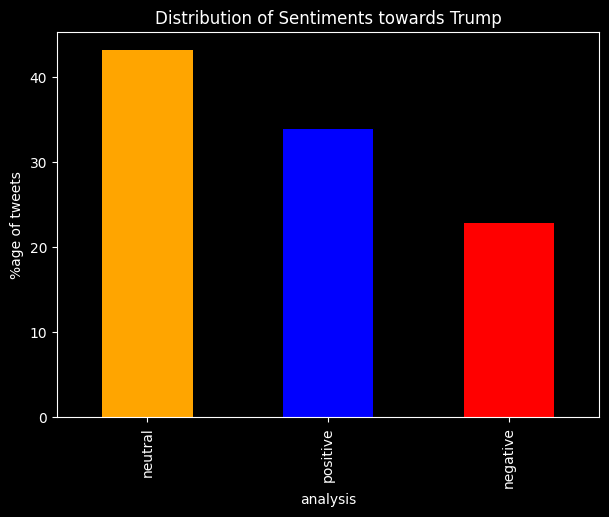

In [39]:
# Plot how much data is positive/negative/neutral 
plt.style.use('dark_background') # Adding black theme 

# Define colors for each bar 
colors = ['orange', 'blue', 'red'] 

plt.figure(figsize=(7, 5)) 
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Trump") 
plt.show() 

## Sentiment Analysis for **Biden**

In [40]:
biden_tweets = data[data['candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US'] 
biden_tweets = biden_tweets[['tweet']] 
biden_tweets

,tweet
213259,#elecciones2020 | en #florida: #joebiden dice ...
213260,@islandgirlprv @bradbeauregardj @meidastouch t...
213261,#censorship #hunterbiden #biden #bidenemails #...
213262,"in 2020, #nypost is being #censorship #censore..."
213263,"fbi allegedly obtained hunter biden computer, ..."
...,...
394390,#election #2020elections #trump #biden https:/...
394391,@gop @gopleader @senatemajldr @lindseygrahamsc...
394392,@flotus im excited to have a flotus whose vagi...
394393,the man needs some help...#usa #biden\nwhen wi...


In [41]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean) 
biden_tweets.head()

,tweet,cleantext
213259,#elecciones2020 | en #florida: #joebiden dice ...,elecciones en florida joebiden dice que donald...
213260,@islandgirlprv @bradbeauregardj @meidastouch t...,islandgirlprv bradbeauregardj meidastouch bide...
213261,#censorship #hunterbiden #biden #bidenemails #...,censorship hunterbiden biden bidenemails biden...
213262,"in 2020, #nypost is being #censorship #censore...",nypost censorship censored twitter manipulate ...
213263,"fbi allegedly obtained hunter biden computer, ...",fbi allegedly obtained hunter biden computer d...


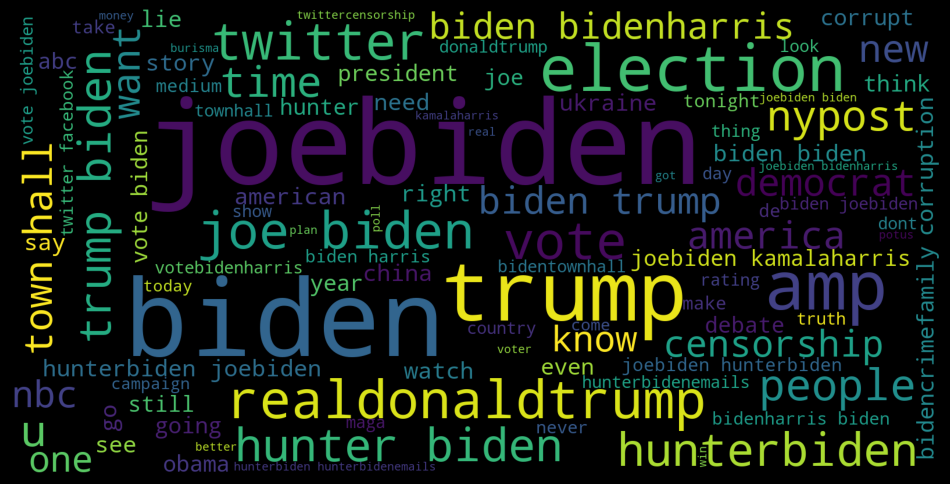

In [42]:
word_cloud(biden_tweets['cleantext'][:5000])

**COMMENT ON THE WORDCLOUD** This cloud of words is used to understand the overall sentiment of the tweets in Biden's dataset. Besides "joebiden" and "biden", recurrent words are "trump" and "realdonaldtrump", referring to his rival, or "bidenharris" and "kamalaharris", referring to his vice president candidate. Then there are many neutral words related to the context, like "democrat", "elections", "nypost", "vote", "amp" (which stands for American party), and some negative ones like "corruption", "lie", "censorship". Moroever, the presence of "hunter" and "hunterbiden" also indicates that many tweets with #biden are related to Joe Biden's son, which is known to have had some legal troubles overtime. Probably, these tweets use the Biden's son as a weapon against him. Still, the cloud of words does not indicate clearly a prevailing attitude towards Biden. 

In [43]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity) 
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity) 
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis) 
biden_tweets.head() 

,tweet,cleantext,subjectivity,polarity,analysis
213259,#elecciones2020 | en #florida: #joebiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.00000,neutral
213260,@islandgirlprv @bradbeauregardj @meidastouch t...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000,0.00000,neutral
213261,#censorship #hunterbiden #biden #bidenemails #...,censorship hunterbiden biden bidenemails biden...,0.000000,0.00000,neutral
213262,"in 2020, #nypost is being #censorship #censore...",nypost censorship censored twitter manipulate ...,0.678571,-0.14881,negative
213263,"fbi allegedly obtained hunter biden computer, ...",fbi allegedly obtained hunter biden computer d...,0.100000,-0.10000,negative


In [44]:
biden_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     46.800194
positive    36.350035
negative    16.849770
Name: proportion, dtype: float64

**COMMENT**: almost half of the tweets related to Biden are neutral. For what concerns the rest of the tweets, around 7/10 of them are positive. Hence, the overall attitude towards Biden seems quite positive. 

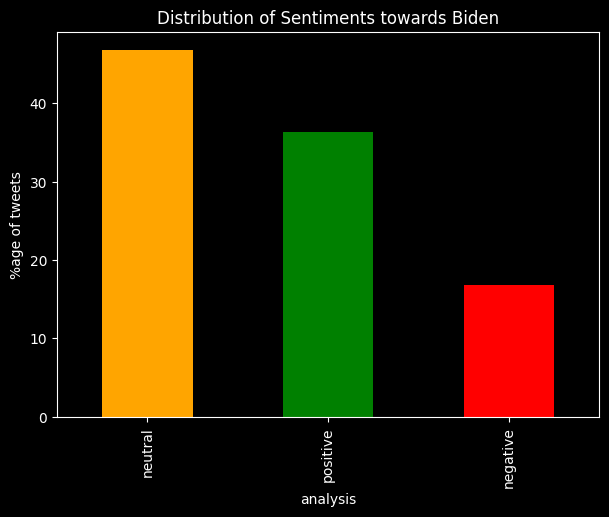

In [45]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') 

# Define colors for each bar 
colors = ['orange', 'green', 'red'] 

plt.figure(figsize=(7, 5)) 
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Biden") 
plt.show() 

## Final Comment 
Comparing the percentages related to the sentiment of tweets of both Biden and Trump, both have a majority of tweet with a neutral tone (43% for Trump and 46% for Biden), but in the case of Biden the percentage difference between positive and negative tweets is almost the double with respect to Trump (20% vs 10%). So, Trump is cited in more tweets but receives also more hate, while Biden is mentioned less but the attitudes towards him are in general more positive.